# Reconhecimento de Dígitos **todos contra todos**
## 1.Importando bibliotecas

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Importando função `dados_reduzidos`

In [2]:
from processamento_de_dados.dados_reduzidos import dados_reduzidos

datasets = dados_reduzidos()

data_test_redu_df = datasets['data_test_redu_df']
data_train_redu_df = datasets['data_train_redu_df']

## 3. Função para escolher dígito a ser o único contra os outros

In [3]:
def digito_escolhido(digito, y_train):
    y_digito_escolhido = np.where(y_train == digito, 1, -1)
    
    return y_digito_escolhido

## 4. Plotagem dos dígitos totais

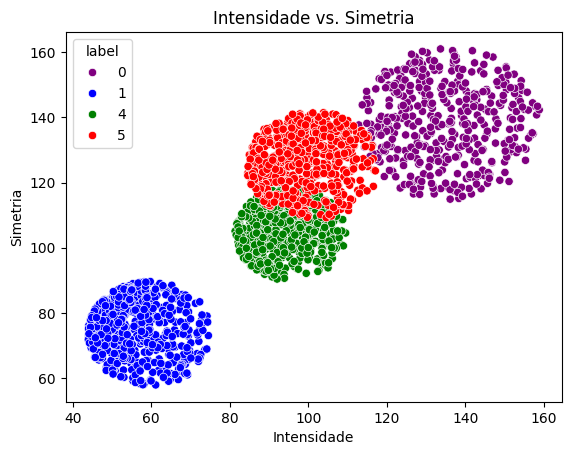

In [4]:
def plotagem_grafico_todos():
    sns.scatterplot(data_train_redu_df, x='intensidade', y='simetria', hue='label', palette={0: 'purple',
                    1: 'blue', 4: 'green', 5: 'red'})
    plt.title('Intensidade vs. Simetria')
    plt.xlabel('Intensidade')
    plt.ylabel('Simetria')

plotagem_grafico_todos()

## 5. Preparação de `X` e `y`

In [5]:
X_train_original = data_train_redu_df.iloc[:, 1:].values
X_train_original = (X_train_original - np.mean(X_train_original, axis=0)) / np.std(X_train_original, axis=0)
y_train_original = data_train_redu_df.iloc[:, 0].values

X_test = data_test_redu_df[['intensidade', 'simetria']].values
X_test= (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)
        
y_test = data_test_redu_df.iloc[:, 0].values

## 6. `get_modelo` retorna a instancia referente ao modelo linear

In [6]:
from modelos_lineares.perceptron import Perceptron
from modelos_lineares.regressao_linear import RegressaoLinear
from modelos_lineares.regressao_logistica import RegressaoLogistica

def get_modelo(nome_modelo):
    if nome_modelo == "Perceptron":
        return Perceptron(taxa_aprendizado=0.01, n_iteracoes=100)
    elif nome_modelo == "Regressao_linear":
        return RegressaoLinear(taxa_aprendizado=0.01, n_iteracoes=10000)
    elif nome_modelo == "Regressao_logistica":
        return RegressaoLogistica(taxa_aprendizado=0.001, n_iteracoes=1000)

## 7. Criação de novos modelos parametrizados pela ordem de digitos
- Cada digito escolhido será eliminado para o treinamento do próximo digito na ordem de digitos, esta função será reutilizada posteriormente e pode ou não plotar gráficos relacionados a previsão dos modelos

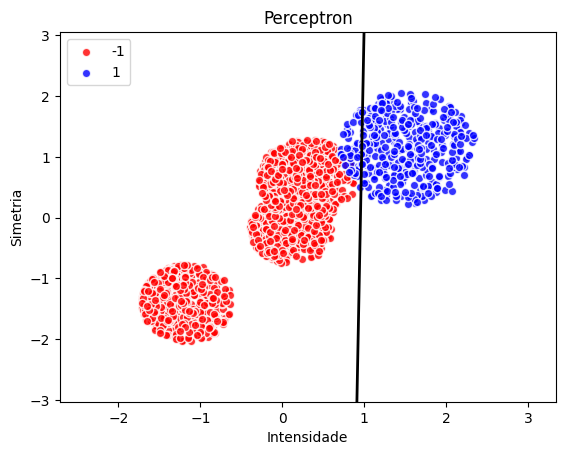

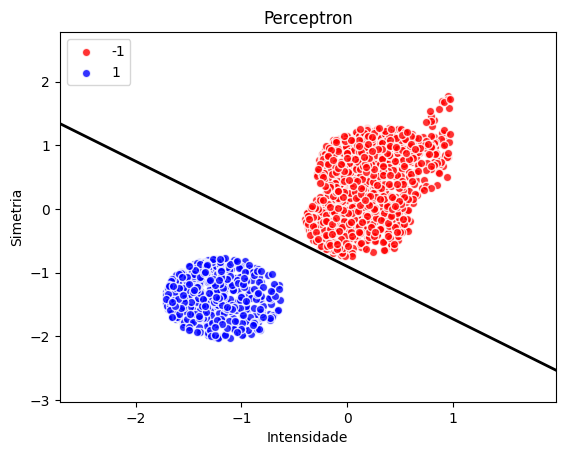

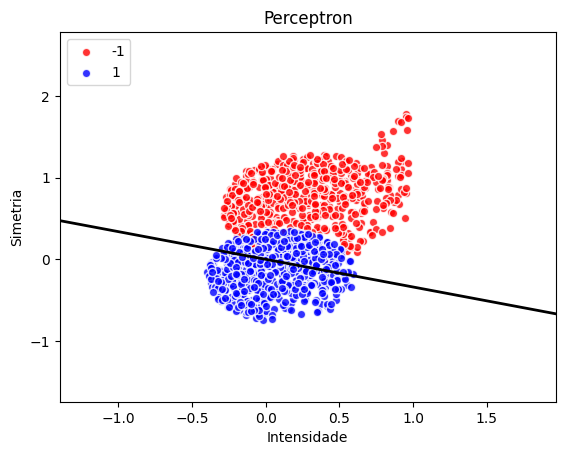

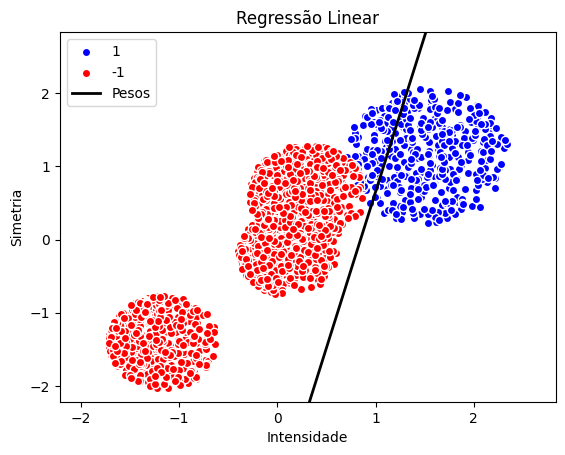

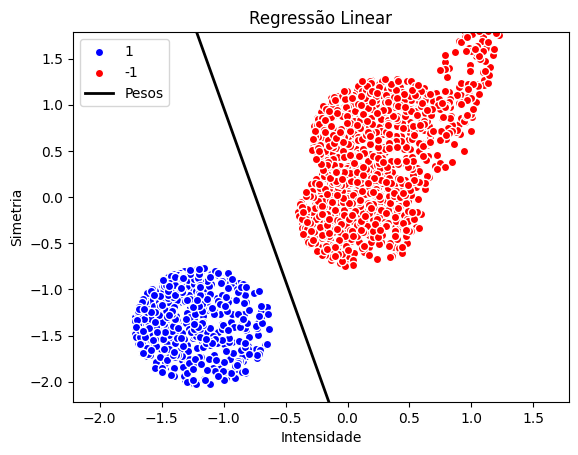

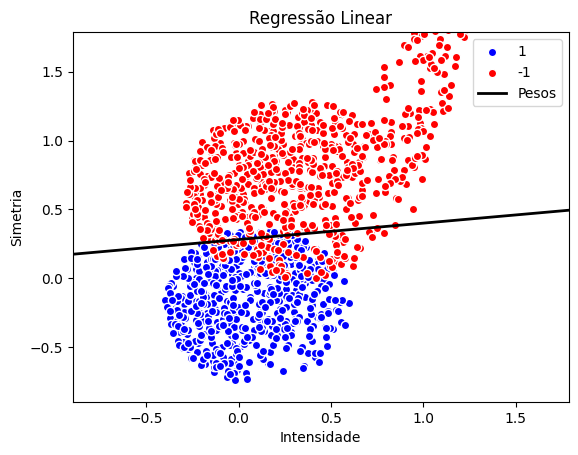

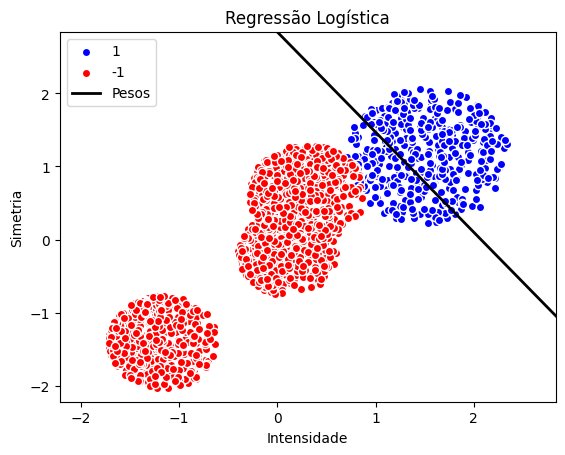

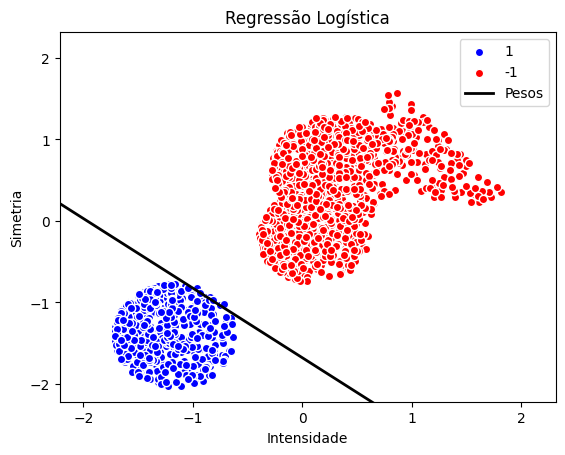

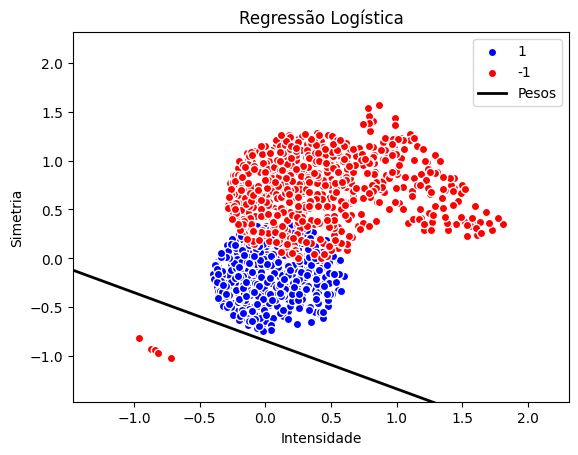

In [7]:
from utils.todos_os_modelos import todos_os_modelos

# * O parâmetro modelo_especifico foi adicionado depois da entrega do dia 01/04/2024
def gerar_modelos(digitos, plotar=True, modelo_especifico=None):    
    if modelo_especifico:
        modelos = {}
        modelos[modelo_especifico] = []
        # * ex.: modelos["Perceptron"] = []
        modelos_iterados = [modelo_especifico]
        # * para a ordem de digitos [0, 1, 4]
        # * modelos = { "Perceptron": [ modelo treinado com 0, modelo treinado com 1, modelo treinado com 4] }
    else:
        modelos = {
            "Perceptron": [],
            "Regressao_linear": [],
            "Regressao_logistica": []
        }
        modelos_iterados = todos_os_modelos
        # ("Perceptron", "Regressao_linear", "Regressao_logistica")
    
    
    for nome_modelo in modelos_iterados:    
        X_train = X_train_original.copy()
        y_train = y_train_original.copy()
        
        for digito in digitos:
            modelo = get_modelo(nome_modelo)
            
            y_digito_escolhido = digito_escolhido(digito, y_train)
            modelo.ajuste(X_train, y_digito_escolhido)
            
            if plotar:
                modelo.plotar(X_train, y_digito_escolhido)
            
            y_previsao = modelo.prever(X_train)
            linhas_digito_a_ser_deletado = np.where(y_previsao == 1)[0]

            y_train = np.delete(y_train, linhas_digito_a_ser_deletado, axis=0)
            X_train = np.delete(X_train, linhas_digito_a_ser_deletado, axis=0)

            modelos[nome_modelo].append(modelo)
        
    return modelos

modelos = gerar_modelos([0, 1, 4])

## 8. Obter a previsão para cada digito na imagem, se for 1 retorna o digito, se não e se for 4 retorna 5

In [8]:
def obter_previsao(imagem, modelo, digitos = [0, 1, 4]):
    for index, digito in enumerate(digitos):
        if modelo[index].prever(imagem) == 1:
            return digito
        else:
            if digito == 4:
                return 5  

## 9. Gerar matriz de confusão e relatório de classificação para cada um dos modelos

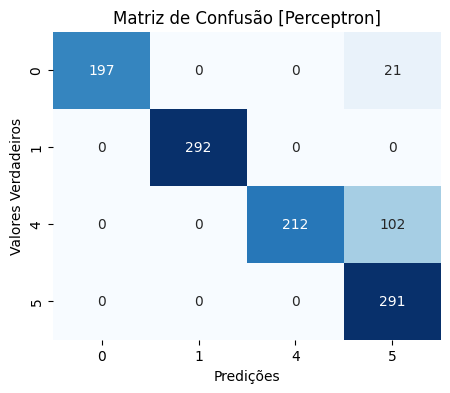

              precision    recall  f1-score   support

           0       1.00      0.90      0.95       218
           1       1.00      1.00      1.00       292
           4       1.00      0.68      0.81       314
           5       0.70      1.00      0.83       291

    accuracy                           0.89      1115
   macro avg       0.93      0.89      0.90      1115
weighted avg       0.92      0.89      0.89      1115



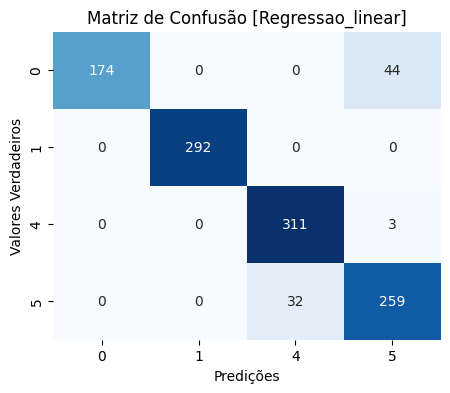

              precision    recall  f1-score   support

           0       1.00      0.80      0.89       218
           1       1.00      1.00      1.00       292
           4       0.91      0.99      0.95       314
           5       0.85      0.89      0.87       291

    accuracy                           0.93      1115
   macro avg       0.94      0.92      0.93      1115
weighted avg       0.93      0.93      0.93      1115



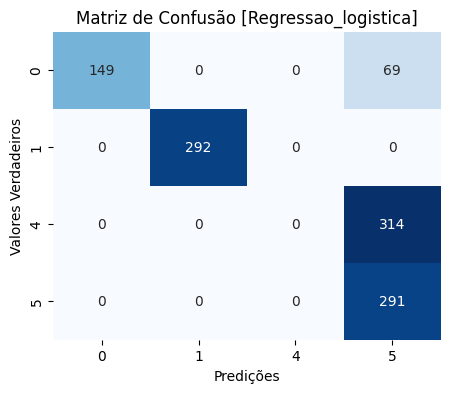

              precision    recall  f1-score   support

           0       1.00      0.68      0.81       218
           1       1.00      1.00      1.00       292
           4       0.00      0.00      0.00       314
           5       0.43      1.00      0.60       291

    accuracy                           0.66      1115
   macro avg       0.61      0.67      0.60      1115
weighted avg       0.57      0.66      0.58      1115



c:\Users\gabri\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gabri\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gabri\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [9]:
from processamento_de_dados.gerar_matriz_de_confusao import gerar_matriz_de_confusao
from processamento_de_dados.gerar_relatorio_de_classificacao import gerar_relatorio_classificacao

y_previsoes = []
        
for nome_modelo in todos_os_modelos:             
    y_previsoes = [obter_previsao(imagem, modelos[nome_modelo]) for imagem in X_test]

    gerar_matriz_de_confusao(y_test, y_previsoes, modelo=nome_modelo)
    gerar_relatorio_classificacao(y_test, y_previsoes)

In [10]:
melhores_resultados = {
    "Perceptron": {
        "ordem": [],
        "acuracia": 0,
    }, 
    "Regressao_linear": {
        "ordem": [],
        "acuracia": 0,
    },
    "Regressao_logistica": {
        "ordem": [],
        "acuracia": 0,
    }
}

In [11]:
from processamento_de_dados.acuracia import acuracia

def calcular_acuracia_para_ordem(digitos, modelo):
    y_previsoes = [obter_previsao(imagem, modelo, digitos) for imagem in X_test]
    
    return acuracia(y_previsoes, y_test)

## 10. Melhores resultados de acurácia serão calculados para cada um dos modelos testando com a permutação dos digitos (representando as possíveis labels do problema).

- Para cada tipo de modelo
    - Modelo é gerado com a permutação dos digitos
    - Checa se possui a melhor acurácia
    - Salva a melhor acurácia e ordem de permutação dos digitos para cada modelo

In [12]:
from tqdm import tqdm
from itertools import permutations

# Permutação [0, 1, 4]
# [[0, 1, 4], [0, 4, 1], [1, 0, 4], [1, 4, 0], [4, 0, 1], [4, 1, 0]]  3x (para cada tipo de modelo linear)

# Testando todas as permutações possíveis dos dígitos e encontrando a melhor ordem
for nome_modelo in tqdm(todos_os_modelos, desc="Modelos"):
    melhor_acuracia = 0.0
    melhor_ordem = []
    
    for ordem_digitos in tqdm(permutations([0, 1, 4]), desc=f"Permutações - {nome_modelo}"):
        # Gerando novos modelos após permutar a ordem de digitos
        # Com isso, é calculada a acuracia para essa nova ordem
        modelos = gerar_modelos(ordem_digitos, plotar=False, modelo_especifico=nome_modelo)
        
        acuracia_atual = calcular_acuracia_para_ordem(list(ordem_digitos), modelos[nome_modelo])

        if acuracia_atual > melhor_acuracia:
            melhor_acuracia = acuracia_atual
            melhor_ordem = ordem_digitos
            
    melhores_resultados[nome_modelo]["acuracia"] = melhor_acuracia
    melhores_resultados[nome_modelo]["ordem"] = melhor_ordem

Permutações - Perceptron: 6it [00:22,  3.72s/it]
Permutações - Regressao_linear: 6it [00:02,  2.33it/s]
Permutações - Regressao_logistica: 6it [00:00, 10.85it/s]
Modelos: 100%|██████████| 3/3 [00:25<00:00,  8.48s/it]


In [13]:
from IPython.display import display, HTML

def apresentar_melhores_resultados():
    for nome_modelo in todos_os_modelos:
        display(HTML(f"<h2>Melhor ordem {nome_modelo}: {melhores_resultados[nome_modelo]['ordem']}, \
                com acurácia: {round(melhores_resultados[nome_modelo]['acuracia'], 3)}</h2>"))
        
apresentar_melhores_resultados()